# Importing Necessary Libraries

In [ ]:
!pip install nltk
!pip install wordlist

In [ ]:
import os
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')


# Defining The Keyword Dictionary
* Financial
* Legal & Regulatory
* tax
* Other-Idiosyncratic
* Other-Systematic

In [ ]:

  word_lists= {
    "Financial": [
      "anti-takeover (provisions|provision)",
      "bank debt",
      "capital (expenditure|expenditures)",
      "capital (lease|leases)",
      "chapter 11",
      "chapter 7",
      "chapter 9",
      "collateral",
      "concentrated ownership",
      "(covenant|covenants)",
      "credit (facility|facilities)",
      "credit rating",
      "credit risk",
      "debt burden",
      "decline in stock price",
      "default",
      "defined benefit",
      "dilution",
      "dividends",
      "downgrade",
      "family",
      "financial condition",
      "financing costs",
      "funded status",
      "illiquid market",
      "improvements",
      "indebtedness",
      "insider sales",
      "investment in equipment",
      "investment in plant",
      "(lease|leases|leasing)",
      "lease (commitment|commitments)",
      "leverage",
      "leveraged (lease|leases)",
      "limited trading",
      "liquidity",
      "loan",
      "locked-in (lease|leases)",
      "mandatory contribution",
      "maturity",
      "negative operating cash flow",
      "new financing",
      "obligations",
      "opeb",
      "o.p.e.b.",
      "operating losses",
      "penny stock",
      "postretirement",
      "rating",
      "refinance",
      "refinancing",
      "reinsurance",
      "renegotiation",
      "reserves",
      "revolver",
      "sale of productive assets",
      "stock market listing",
      "stock price drop",
      "stock price volatility",
      "underfunded pensions",
      "underwriting",
      "volatility of operating results",
      "volatility of revenues",
      "volatility of sales",
      "working capital"
    ],
    "Other-Idiosyncratic": [
      "acquisition",
      "adequate staffing",
      "advertising",
      "asset (impairment|impairments)",
      "asset (securitization|securitizations)",
      "assimilation",
      "backlog",
      "brand",
      "brand recognition",
      "california power crisis",
      "certification",
      "clinical (trial|trials)",
      "commercialize",
      "concentration",
      "consolidation",
      "construction",
      "(contract|contracts)",
      "(copyright|copyrights)",
      "corporate culture",
      "cost control",
      "customer concentration",
      "customer service",
      "delivery",
      "distribution",
      "(distributor|distributors)",
      "downsizing",
      "economies of scale",
      "embargo",
      "enron",
      "expand",
      "expanding",
      "expansion",
      "(export|exports)",
      "facilities",
      "franchise",
      "franchisee",
      "goodwill",
      "goodwill (impairment|impairments)",
      "impairment",
      "information technology",
      "innovation",
      "insurance coverage",
      "intangible",
      "(secret|secrets)",
      "(integrate|integrating|integration)",
      "intellectual",
      "internal (control|controls)",
      "internet",
      "investment in (subsidiary|subsidiaries)",
      "it",
      "i.t.",
      "joint (venture|ventures)",
      "keep and retain top management",
      "key personnel",
      "labor (cost|costs)",
      "labor relations",
      "labor (union|unions)",
      "(license|licenses)",
      "limited operating history",
      "maintenance",
      "management retention",
      "market acceptance",
      "marketing",
      "material (weakness|weaknesses)",
      "mbs",
      "m.b.s.",
      "merger",
      "mortgage backed securities",
      "mortgage servicing rights",
      "msr",
      "m.s.r.",
      "natural disasters",
      "new construction",
      "new product acceptance",
      "new product development",
      "no current operations",
      "online",
      "orders",
      "patent",
      "personnel",
      "preclinical",
      "product",
      "product development",
      "product mix",
      "product performance",
      "production",
      "proprietary",
      "publicity",
      "redundancy",
      "reliance on key (customer|customers)",
      "reliance on key (supplier|suppliers)",
      "reporting controls",
      "research and development",
      "restructuring",
      "restructuring implementation",
      "sarbanes-oxley",
      "security",
      "shortages",
      "single customer",
      "single supplier",
      "software",
      "sole (supplier|suppliers)",
      "spe",
      "s.p.e.",
      "special purpose entity",
      "strike",
      "(supplier|suppliers)",
      "supply chain",
      "(synergy|synergies)",
      "systems",
      "(tariff|tariffs)",
      "technological obsolescence",
      "technologies",
      "technology",
      "trade",
      "(trademark|trademarks)",
      "training",
      "union election",
      "variable interest entity",
      "(vendor|vendors)",
      "vie",
      "v.i.e.",
      "weather",
      "web security",
      "(website|websites)"
    ],
    "Legal & Regulatory": [
      "adverse judgment",
      "anti-trust",
      "casualty",
      "charged",
      "class action",
      "compliance",
      "comply",
      "(conflict|conflicts) of interest",
      "contamination",
      "defendant",
      "deregulation",
      "effects of implementing new (standard|standards)",
      "effects of implementing new (method|methods)",
      "enforceability of judgments",
      "enforcement",
      "environmental",
      "fda approval",
      "federal",
      "fines",
      "fraud",
      "government investigation",
      "government policy",
      "governmental approval",
      "ifrs",
      "i.f.r.s.",
      "infringe",
      "injury",
      "inquiries",
      "inquiry",
      "intellectual property",
      "(investigation|investigations)",
      "legislation",
      "litigation",
      "pay damages",
      "(penalty|penalties)",
      "pending (lawsuit|lawsuits)",
      "plaintiff",
      "possibility of (restatement|restatements)",
      "potential (lawsuit|lawsuits)",
      "product liability",
      "(regulation|regulations)",
      "regulatory",
      "regulatory approval",
      "regulatory change",
      "regulatory compliance",
      "regulatory environment",
      "related (party|parties)",
      "remediation",
      "(restatement|restatements)",
      "safety",
      "superfund",
      "uncertainties regarding accounting estimates"
    ],
    "Other-Systematic": [
      "economic uncertainties",
      "economy",
      "electricity",
      "energy",
      "eu",
      "e.u.",
      "euro",
      "european union",
      "exchange (rate|rates)",
      "financial crisis",
      "fiscal policy",
      "foreign currency",
      "foreign exchange",
      "(forward|forwards)",
      "fuel",
      "future",
      "gas",
      "gasoline",
      "gdp",
      "g.d.p.",
      "gnp",
      "g.n.p.",
      "general business risks",
      "general conditions",
      "general economic conditions",
      "gold",
      "growth (rate|rates)",
      "hedge",
      "hedging",
      "afghanistan",
      "housing",
      "housing starts",
      "industry (condition|conditions)",
      "industry environment",
      "(market|markets)",
      "market demand",
      "market supply",
      "marketplace",
      "materials",
      "(metal|metals)",
      "middle east",
      "(mineral|minerals)",
      "mining",
      "monetary policy",
      "mortgage",
      "natural gas",
      "obsolescence",
      "oil",
      "operating environment",
      "option",
      "ore",
      "overstocked",
      "peso",
      "petroleum",
      "political climate",
      "political instability",
      "pound",
      "price pressure",
      "prices",
      "pricing power",
      "raw (material|materials)",
      "real",
      "real estate investment trust",
      "recession",
      "reit",
      "r.e.i.t.",
      "renmenbi",
      "rmb",
      "ruble",
      "rupee",
      "saving",
      "seasonal",
      "september (11|11th)",
      "short",
      "silver",
      "steel",
      "(substitute|substitutes)",
      "swap",
      "terrorism",
      "us dollar",
      "underlying",
      "unsalable inventory",
      "war",
      "yen",
      "yuan"
    ],



  "tax": [
    "aggressive tax (position|positions)",
    "back taxes",
    "deferred tax (asset|assets)",
    "deferred tax (liability|liabilities)",
    "excise (tax|taxes)",
    "fin 48",
    "internal revenue service",
    "irs",
    "i.r.s.",
    "irs audit",
    "irs judgment",
    "loss (carryback|carrybacks)",
    "loss (carryforward|carryforwards)",
    "property (tax|taxes)",
    "provision for income (tax|taxes)",
    "state (tax|taxes)",
    "(tax|taxes)",
    "tax audit",
    "tax (authority|authorities)",
    "tax (liability|liabilities)",
    "tax (penalty|penalties)",
    "taxable",
    "uncertain tax (position|positions)",
    "vat",
    "v.a.t.",
    "value added tax"
  ]



}


# Preprocessing function to clean the text

In [ ]:

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Function to calculate TF-IDF scores for a given text

In [ ]:

def calculate_tfidf(text, word_lists):
    all_words = list(set([word for sublist in word_lists.values() for word in sublist]))
    vectorizer = TfidfVectorizer(vocabulary=all_words)
    tfidf_matrix = vectorizer.fit_transform([text])
    tfidf_scores = pd.DataFrame(tfidf_matrix.T.toarray(), index=vectorizer.get_feature_names_out(), columns=["tfidf"])
    return tfidf_scores

# Function to process each yearwise data folder and compute TF-IDF values

In [ ]:

def process_yearwise_data(dataset_path, word_lists):
    final_results = []
    for folder in os.listdir(dataset_path):
        full_path = os.path.join(dataset_path, folder)
        if os.path.isdir(full_path) and 'combined_yearly_data' in folder:
            print(f"Processing folder: {folder}")
            for file in os.listdir(full_path):
                if file.endswith(".csv"):
                    file_path = os.path.join(full_path, file)
                    year_match = re.match(r'(\d{4})\.csv', file)
                    if year_match:
                        year = year_match.group(1)
                    else:
                        print(f"Year not found in filename: {file}")
                        continue
                    try:
                        df = pd.read_csv(file_path)
                        print(f"Processing file: {file_path}")
                        for index, row in df.iterrows():
                            transcript = row['Extracted 1A']
                            ticker = row['Ticker']
                            cleaned_transcript = preprocess_text(transcript)
                            tfidf_scores = calculate_tfidf(cleaned_transcript, word_lists)
                            row_result = {'company': ticker, 'year': year, 'transcript': transcript}
                            for parameter in word_lists.keys():
                                combined_tfidf = tfidf_scores.loc[word_lists[parameter], 'tfidf'].sum()
                                row_result[parameter] = combined_tfidf
                            final_results.append(row_result)
                    except Exception as e:
                        print(f"Error processing file {file_path}: {e}")
    if final_results:
        final_df = pd.DataFrame(final_results)
        return final_df
    else:
        print("No data processed.")
        return pd.DataFrame()

# Plotting the changes in cultural values over time

In [ ]:

def plot_cultural_values_change(final_df):
    cultural_values_columns = list(word_lists.keys())
    mean_cultural_values = final_df.groupby('year')[cultural_values_columns].mean()
    plt.figure(figsize=(12, 8))
    for value_column in cultural_values_columns:
        plt.plot(mean_cultural_values.index, mean_cultural_values[value_column], label=value_column, marker='o')
    plt.title("Change in Risk Types Per Year", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Mean Risk Value", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Risk Types")
    plt.tight_layout()
    plt.show()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Processing folder: combined_yearly_data_250_300
Processing file: /kaggle/input/item-1a/ITEM 1A RISK FACTORS/combined_yearly_data_250_300/2011.csv
Processing file: /kaggle/input/item-1a/ITEM 1A RISK FACTORS/combined_yearly_data_250_300/2008.csv
Processing file: /kaggle/input/item-1a/ITEM 1A RISK FACTORS/combined_yearly_data_250_300/2013.csv
Processing file: /kaggle/input/item-1a/ITEM 1A RISK FACTORS/combined_yearly_data_250_300/2015.csv
Processing file: /kaggle/input/item-1a/ITEM 1A RISK FACTORS/combined_yearly_data_250_300/2014.csv
Processing file: /kaggle/input/item-1a/ITEM 1A RISK FACTORS/combined_yearly_data_250_300/2009.csv
Processing file: /kaggle/input/item-1a/ITEM 1A RISK FACTORS/combined_yearly_data_250_300/2021.csv
Processing file: /kaggle/input/item-1a/ITEM 1A RISK FACTORS/combined_yearly_data_250_300/2017.csv
Processing file: /kaggle/input/item-1a/ITEM 

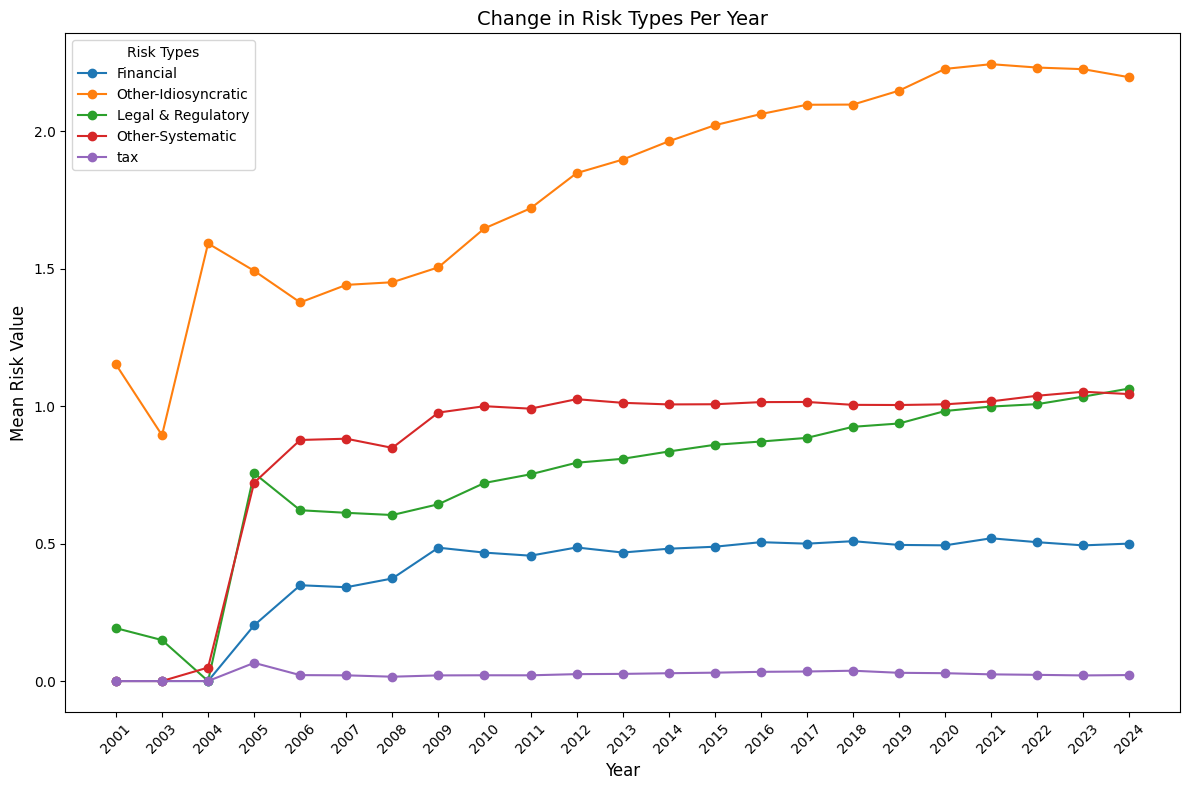

In [ ]:
if __name__ == "__main__":
    dataset_path = "/kaggle/input/item-1a/ITEM 1A RISK FACTORS"
    final_df = process_yearwise_data(dataset_path, word_lists)
    if not final_df.empty:
        print(f"Processed {final_df.shape[0]} rows successfully.")
        plot_cultural_values_change(final_df)


In [ ]:
final_df.head()

,company,year,transcript,Financial,Other-Idiosyncratic,Legal & Regulatory,Other-Systematic,tax
0,MAA,2011,RISK FACTORS In addition to the other informat...,0.998868,0.903738,0.975086,1.950171,0.166478
1,RF,2011,Item 1A.\nRisk Factors\nRisk Factors \nOur ...,1.068028,0.735753,1.352836,1.068028,0.059335
2,COO,2011,Item 1A. Risk Factors. \n\nOur business faces...,0.314232,2.580011,1.637314,0.826927,0.033077
3,LH,2011,Item 1A. Risk Factors \n\n\nRisks Associated w...,0.075188,1.904768,1.929831,0.451129,0.000000
4,NTRS,2011,Item 1ARisk Factors From an investors stan...,0.898027,1.646382,1.287171,0.419079,0.000000


In [ ]:
final_df.columns

Index(['company', 'year', 'transcript', 'Financial', 'Other-Idiosyncratic',
       'Legal & Regulatory', 'Other-Systematic', 'tax'],
      dtype='object')

In [ ]:
final_df=final_df.drop('transcript',axis=1)

In [ ]:
final_df.head()

,company,year,Financial,Other-Idiosyncratic,Legal & Regulatory,Other-Systematic,tax
0,MAA,2011,0.998868,0.903738,0.975086,1.950171,0.166478
1,RF,2011,1.068028,0.735753,1.352836,1.068028,0.059335
2,COO,2011,0.314232,2.580011,1.637314,0.826927,0.033077
3,LH,2011,0.075188,1.904768,1.929831,0.451129,0.000000
4,NTRS,2011,0.898027,1.646382,1.287171,0.419079,0.000000


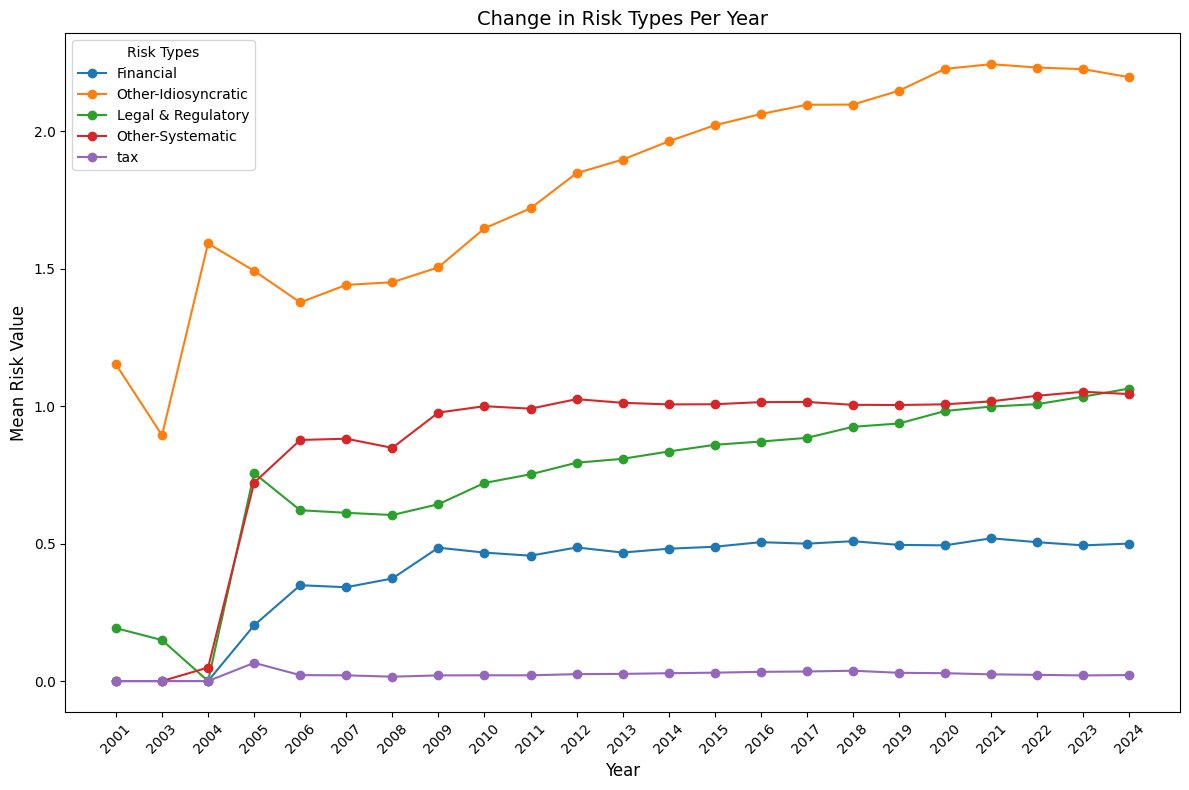

In [ ]:
final_df.to_csv("5_risk_factors_s&p_500.csv", index=False)